# Product of independent complex-circular Gaussian Random Variable

Let $z\sim \mathcal{CN}(0, \sigma^2)$ and if $z = x + {\rm j}y$, both $x$ and $y$ are zero mean Gaussian r.v. with variance $\sigma^2/2$.

In [9]:
# magic
%matplotlib inline

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# prettyplot stuff
import seaborn as sns
sns.set(style='ticks', palette='Set2')
sns.despine()

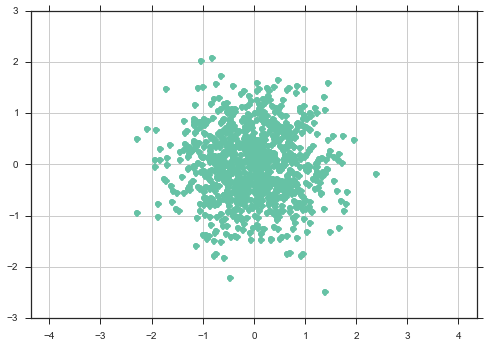

In [11]:
mu = 0
sigmasq = 1
sd = np.sqrt(sigmasq)
# Generate complex gaussian r.v. samples
x = np.random.normal(loc = mu, scale = sd/np.sqrt(2), size = 1000)
y = np.random.normal(loc = mu, scale = sd/np.sqrt(2), size = 1000)
z = x + 1j*y
h = plt.plot(np.real(z), np.imag(z), 'o')
plt.axis('equal')
plt.grid(True)


Express $z = |z|e^{j\phi}$. The magnitude $|z|$ is Rayleigh distributed while the phase $\phi = \operatorname{arg}(z)$ is uniform over the interval $[-\pi, \pi)$.

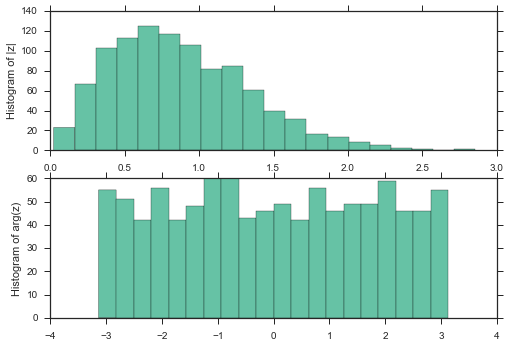

In [12]:
z_mag = np.abs(z)
z_arg = np.angle(z)

plt.subplot(211)
plt.hist(z_mag, 20)
plt.ylabel('Histogram of |z|')
plt.subplot(212)
plt.hist(z_arg, 20)
plt.ylabel('Histogram of arg(z)')


Consider two independent complex gaussian r.v. $w$ and $z$ both $\mathcal{CN}(0, \sigma^2)$. Let $w = |w|e^{j\theta}$ and $p = |p|e^{j\omega}$.

**Q** What is the distribution of the phase of the product $p = wz$?

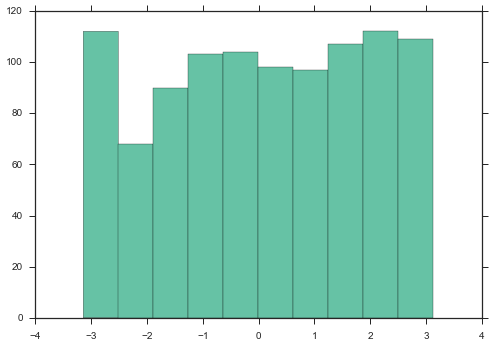

In [13]:
# Generate complex gaussian r.v. samples for w
u = np.random.normal(loc = mu, scale = sd/np.sqrt(2), size = 1000)
v = np.random.normal(loc = mu, scale = sd/np.sqrt(2), size = 1000)
w = u + 1j*v
p = w*z
p_arg = np.angle(p)
h = plt.hist(p_arg)

The phase of the product still seems to be uniform over $[-\pi, \pi)$. The phase of the product $p$ is sum of the phase of $w$ and $z$, both of which are uniform. The pdf of the sum of two r.v. is given by the convolution of their respective pdfs. Following this notion, the pdf of $\omega$ should have been convolution between two uniform distribution over $[-\pi, \pi)$ which leads to a triangular pdf over $[-2\pi, 2\pi)$. However, it is not the case as seen in the histogram above. What are we missing here?

It must be noted that a complex exponential function is periodic with period of $2\pi$, i.e., $e^{j\theta} = e^{j(\theta + k*2pi)}$ where $k$ is an integer. Hence the pdf of the phase $\theta$ is periodic too. Since the phase $\theta$ is periodic, the convolution between the phase pdfs should be a *periodic convolution* rather than *linear convolution*. A periodic convolution between two uniform pdfs results in another uniform pdf. This justifies the result obtained above.